In [ ]:
'''

Password - 1000k unique values for password collected online

Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..
Strength of the password based on rules(such as containing digits, special symbols , etc.)


The passwords used in our analysis are from 000webhost leak that is available online

'''

# 1.. read data from SQL Database !

Importing All the Necessary Libraries 



In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sqlite3 module in Python is used to work with SQLite databases. SQLite is a lightweight, disk-based database engine that doesn't require a separate server process. It allows you to create, read, update, and delete data in a database file using SQL queries.

In [133]:
import sqlite3

In [134]:
# first I have created a SQL connection to our SQLite database

sau = sqlite3.connect(r"C:\Users\saurabht\Desktop\Pratoices EXERCISE\UDEMY VIP PROJECTS and its DATA\password_resources/password_Data.sqlite")

In [135]:
## Cheking the Table Name on Particulaer File 
data = pd.read_sql_query("SELECT * From Users", sau)

In [136]:
data.shape

(100000, 3)

In [137]:
data.head(5)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


# 2.. Doing basic data cleaning !

In [138]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

 Removing ir-relevant features !

In [139]:
data.drop(["index"] , axis = 1 , inplace = True)

In [140]:
data.head(5)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


DOING DATA CLEANING 

In [141]:
# Cheking the Duplicates --Here If its show false its means there Is no Duplicates and sum()tell the total no of duplicates presents
data.duplicated().sum()

0

In [142]:
# Checking the Misssig Values in columns --  false means there is no missig values aviable any() func chek the all  the columns 
data.isnull().any()

password    False
strength    False
dtype: bool

In [144]:
data.isnull().any().sum() # Means 0 fitures having NAN Values in The table 

0

check data-types of every feature !

In [145]:
data.dtypes

password    object
strength     int64
dtype: object

In [146]:
# checking if there any irrelvent rows are not means Any -ve instnace are presnet are not 
data['strength']

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [147]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

# 3.. Performing Semantic Analysis !
    e.g ,,      
          
          a) How many password textual actually holds only numeric characters ?
          b) How many password textual actually holds only Upper-case character ? 
          
          c) How many password textual actually holds only alphabet ?
          d) How many password textual actually holds alpha-numeric character ? 
          e) How many password textual actually holds title-case character ? 
          
          f) How many password textual actually holds some special special character ? 
          

Performing Semantic Analysis!

In [148]:
data.columns

Index(['password', 'strength'], dtype='object')

In [149]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [150]:
data["password"][0]

'zxe870819'

In [151]:
type(data["password"][0])

str

a) How many password textual actually holds only numeric characters ?

In [152]:
data['password'].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [153]:
#code snippet selects rows from the DataFrame data where the 'password' column contains numeric values.
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [154]:
data[data["password"].str.isnumeric()].shape  ### only 26 people have set their password as only number !

(26, 2)

b) How many password textual actually holds only Upper-case character ?

In [155]:
data[data["password"].str.isupper()]

# Only 1506 user having their Passowrdd as only Capital Letter 

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [156]:
data[data["password"].str.isupper()].shape

(1506, 2)

 c) How many password textual actually holds only alphabet ?

In [31]:
data[data["password"].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [157]:
data[data["password"].str.isalpha()].shape

# So here Aroung 50 users have their passowrd as alpha letters only !

(50, 2)

 d) How many password textual actually holds alpha-numeric character ? 

In [159]:
data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [160]:
data[data['password'].str.isalnum()].shape

# So here most of the users around 97K have their password as alpha-numeric..

(97203, 2)

e) How many password textual actually holds title-case character ? 

In [161]:
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [162]:
data[data["password"].str.istitle()].shape

#### around 932 users have their password having first alphabet capital !

(932, 2)

f) How many password textual actually holds some special special character ?

In [163]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [164]:
import string

In [165]:
# all punctuations defined in "string" package 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [166]:
def find(row):
    for char in row :
        if char in string.punctuation:
            return 1
        else:
            pass

In [167]:
data["password"].apply(find)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [169]:
data[data["password"].apply(find)==1]

## 2663 observations have special characters in between them ..
## 2.6% people password actually uses special character in their password ..

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


## 4.. Applying Feature Engineering !


'''

we have password strength :-
It depends on 5 factors :

    Length of password
    Frequency of Lowercase Characters
    Frequency of Uppercase Characters
    Frequency of Numeric Characters
    Frequency of Special Characters

These will be the result to find factors effecting strength of password..


'''

--------Length of password

In [170]:
data["password"][0]

'zxe870819'

In [171]:
len(data["password"][0])

9

In [172]:
data["password"].str.len()

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: password, Length: 100000, dtype: int64

In [72]:
V = data["password"].str.len() 

In [73]:
print(V)

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: password, Length: 100000, dtype: int64


-----Frequency of Lowercase Characters

In [202]:
password = "Saurabh99"

In [203]:
len(password)

9

In [204]:
[char for char in password if char.islower()]

['a', 'u', 'r', 'a', 'b', 'h']

In [205]:
len([char for char in password if char.islower()])

6

In [206]:
len([char for char in password if char.islower()])/len(password)

#    just  to get rid of some outliers bcz some passwords have huge length as we have seen ,
#    hence value of lowercase could also be high , so lets normalise it in the range between 0 to 1

0.6666666666666666

In [207]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

Frequency of Uppercase Characters

In [208]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

Frequency of the Numeric Characters

In [209]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [210]:
# Here I am Applying the User Defined Functions -----

In [211]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase), 3)

In [212]:
data["Uppercase_freq"] = np.round(data["password"].apply(freq_uppercase), 3)

In [197]:
data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case), 3)

In [199]:
data['length'] = data['password'].apply(lambda x: len(x))


In [213]:
data.head(3)

,password,strength,lowercase_freq,Uppercase_freq,digit_freq,length
0,zxe870819,1,0.333,0.0,0.667,9
1,xw46454nr23l,1,0.417,0.0,0.583,12
2,soporte13,1,0.778,0.0,0.222,9


Frequency of Special Characters---:

In [214]:
def freq_special_case(row):
    special_chars = []
    for char in row :
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
        return len(special_chars)

In [215]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3)

In [216]:
data["special_char_freq"]

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: special_char_freq, Length: 100000, dtype: int64

In [218]:
data.head(5)

,password,strength,lowercase_freq,Uppercase_freq,digit_freq,length,special_char_freq
0,zxe870819,1,0.333,0.0,0.667,9,0
1,xw46454nr23l,1,0.417,0.0,0.583,12,0
2,soporte13,1,0.778,0.0,0.222,9,0
3,accounts6000webhost.com,2,0.783,0.0,0.174,23,0
4,c443balg,1,0.625,0.0,0.375,8,0


In [220]:
data.head()

,password,strength,lowercase_freq,Uppercase_freq,digit_freq,length,special_char_freq
0,zxe870819,1,0.333,0.0,0.667,9,0
1,xw46454nr23l,1,0.417,0.0,0.583,12,0
2,soporte13,1,0.778,0.0,0.222,9,0
3,accounts6000webhost.com,2,0.783,0.0,0.174,23,0
4,c443balg,1,0.625,0.0,0.375,8,0


## 5.. Performing Descriptive Statistics !

Descriptive Statistics focuses on summarizing and describing the main features of a dataset. It provides simple, quantitative summaries about the characteristics of the data, helping to understand its overall properties.

Mean (Average): The sum of all values divided by the number of values.

Median: The middle value of a sorted dataset. If there's an even number of observations,it's the average of the two                      middle values.

Mode:   The most frequently occurring value(s) in the dataset.

Range:  The difference between the maximum and minimum values in the dataset

Variance: The average of the squared differences from the Mean.

Standard Deviation: The square root of the variance, measures the dispersion of values around the Mean.

Percentiles: Values below which a given percentage of observations fall.

Interquartile Range (IQR): The difference between the 75th and 25th percentiles, measures the spread of the middle 50% of the                              data.

In [221]:
data.columns

Index(['password', 'strength', 'lowercase_freq', 'Uppercase_freq',
       'digit_freq', 'length', 'special_char_freq'],
      dtype='object')

This line of code performs a groupby operation on the DataFrame data, specifically on the columns 'strength' and 'length'. Then, it aggregates the grouped data using various summary statistics such as minimum, maximum, mean, and median lengths for each 'strength' category.

In [222]:
data[['length', 'strength']].groupby(['strength']).agg(["min", "max", "mean", "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [224]:
column = ['lowercase_freq', 'Uppercase_freq', 'digit_freq', 'length', 'special_char_freq']

for cols in column:
    print(cols)
    print(data[[cols, 'strength']].groupby(['strength']).agg(["min", "max", "mean", "median"]))
    print('\n')

lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


Uppercase_freq
         Uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.275383  0.286
1               0.0  0.923  0.360123  0.333
2               0.0  0.895  0.193796  0.188


length
         length                       
            min  max       mean median
strength                    

'''

 taking a rough look at the above stats I can say the following:-
 
->> Higher the length, Higher the strength

->> In case on alphabet frequency higher is not better. 
    Probably because it'll not be a strong password if max portion is occupied by just alphabets..
    Password has more strength if the char types are spread in decent proportions.



'''

In [228]:
#### Similarly , if We Can representation of above output : (I can refer boxplot)
## bcz boxplot basically gives us 5-point summary of data !

In [230]:
data.columns

Index(['password', 'strength', 'lowercase_freq', 'Uppercase_freq',
       'digit_freq', 'length', 'special_char_freq'],
      dtype='object')

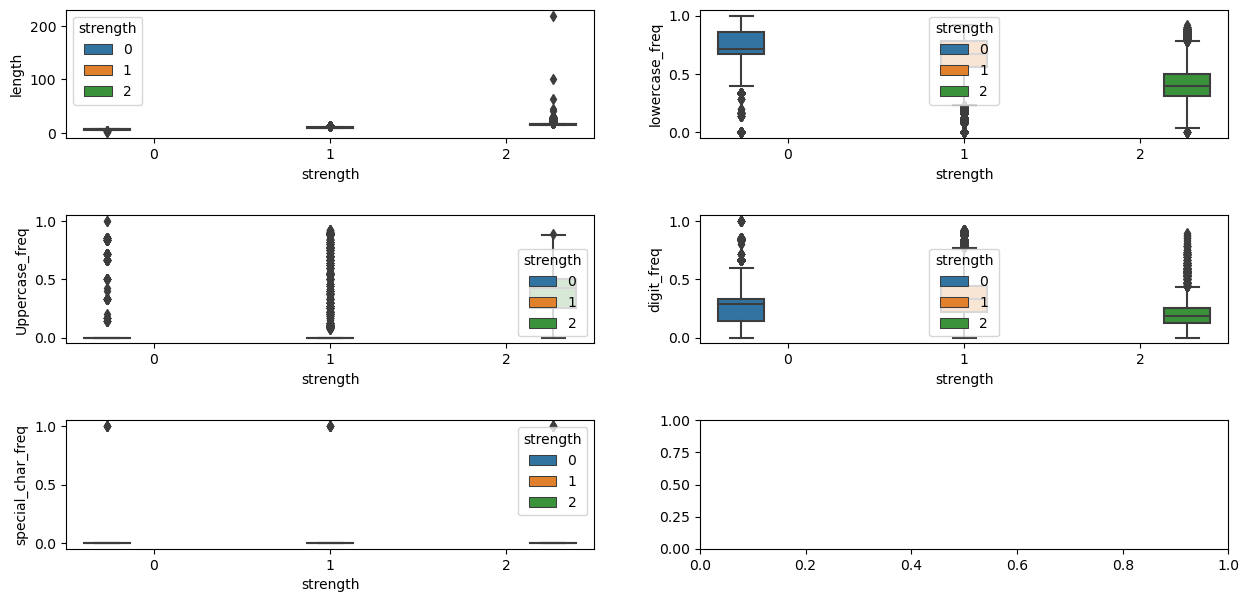

In [242]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15,7))

sns.boxplot(x="strength" , y='length', hue="strength", ax=ax1, data=data)
sns.boxplot(x="strength" , y='lowercase_freq', hue="strength", ax=ax2, data=data)
sns.boxplot(x="strength" , y='Uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)
plt.subplots_adjust(hspace=0.6)
plt.show()


Insights :
Regarding the insights we can say that:-



->> Higher Lowercase frequency is seen in low strength passwords. 
    For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.


->> In digit_freq there is a split of majority poplutation of strength 1 and 2 
    but for 0 and 1 strength , there is overlap so no too much to say there. 
    But we can say a nicely propotioned password is good..
    
    
->> In upper_freq , there is a trend but not as strong as length or lower_freq..
    
    
->> Similar but stronger same trend as above in special_freq.

->> Higher strength passwords have more type breaks.

# 6.. Feature Importance !

( How to figure out imp. feature )


In [243]:
data.columns

Index(['password', 'strength', 'lowercase_freq', 'Uppercase_freq',
       'digit_freq', 'length', 'special_char_freq'],
      dtype='object')

In [244]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

This Python function get_dist is designed to visualize the distribution of a specified feature in dataset, categorized by the 'strength' column. It generates a violin plot and overlaid density plots for each 'strength' category.



This function provides a visual overview of how the distribution of the specified feature varies across different 'strength' categories in dataset, allowing you to observe patterns and differences between the categories.

In [245]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

This Above code snippet is used to suppress warnings in Python.
Suppressing warnings can be useful in certain situations, such as when you expect harmless warnings to be raised during execution and you don't want them to clutter the output.

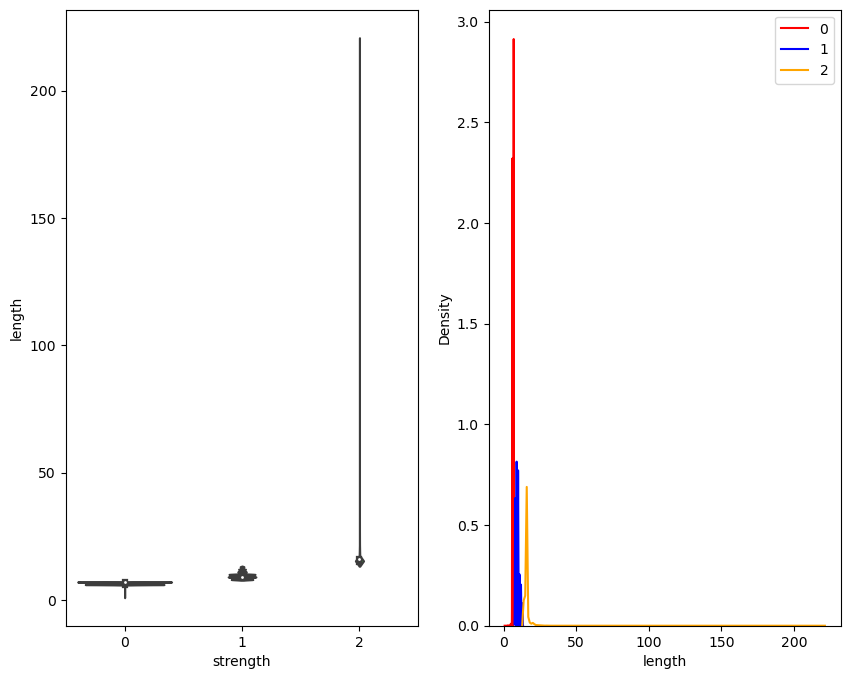

In [246]:
get_dist(data , "length")

we have few overlappping region in distribution plot 
 when class is 2 , we have higher value of 'length' than class 1 & class 0

 it means 'length' is a interesting feature as we have very less overlapping region

similarly from violinplot ,we will say on account of less overlappping , 
 this feature 'length' is amazing & useful in determining the strength

In [247]:
data.columns

Index(['password', 'strength', 'lowercase_freq', 'Uppercase_freq',
       'digit_freq', 'length', 'special_char_freq'],
      dtype='object')

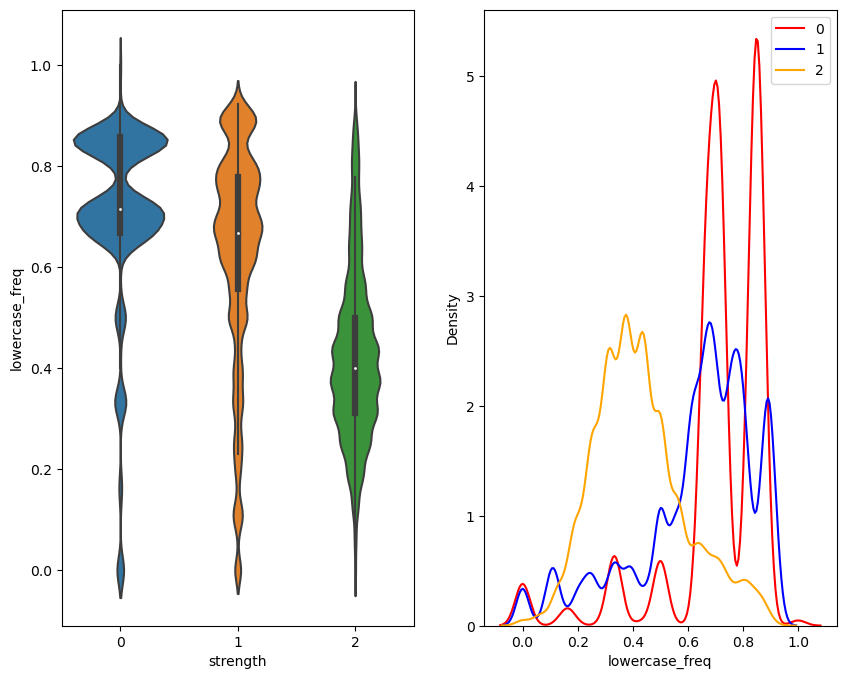

In [248]:
get_dist(data , 'lowercase_freq')

we have some kind of overlappping region in distribution plot 
when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

it means 'lower_freq' is a interesting feature upto some extent as have some overlapping region
similarly from violinplot ,we will say on account of such overlappping , 
when class is 2 we have less value of 'lower_freq' than class 1 & class 0
this feature 'lower_freq' is a interesting feature upto some extent in determining the strength

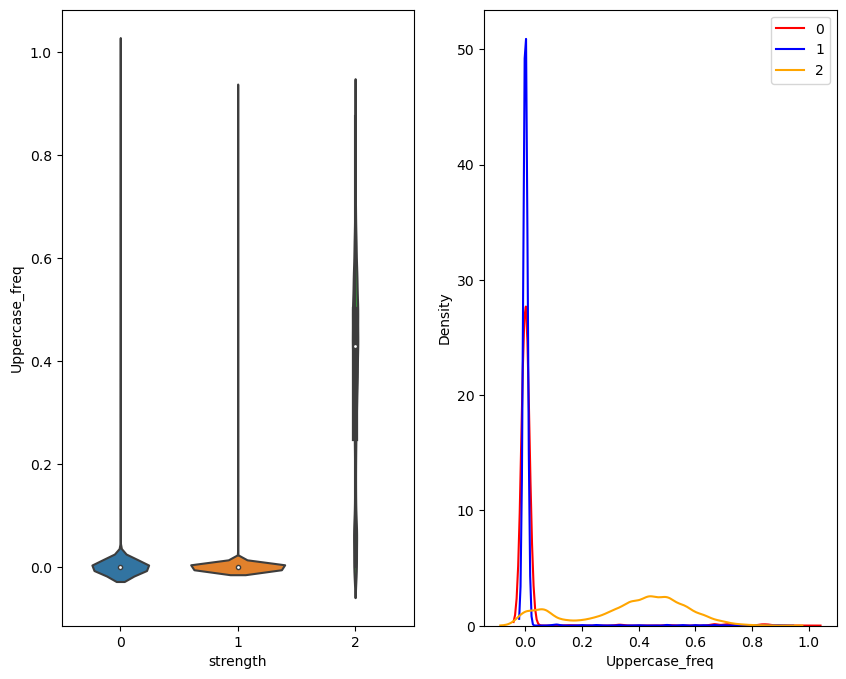

In [250]:
get_dist(data , 'Uppercase_freq')

we have quite high overlappping region in distribution plot 

it means 'upper_freq' is not that much interesting feature as have some overlapping region

 similarly from violinplot ,we will say on account of such huge overlappping , 
this feature 'lower_freq' is not a interesting feature in determining the strength

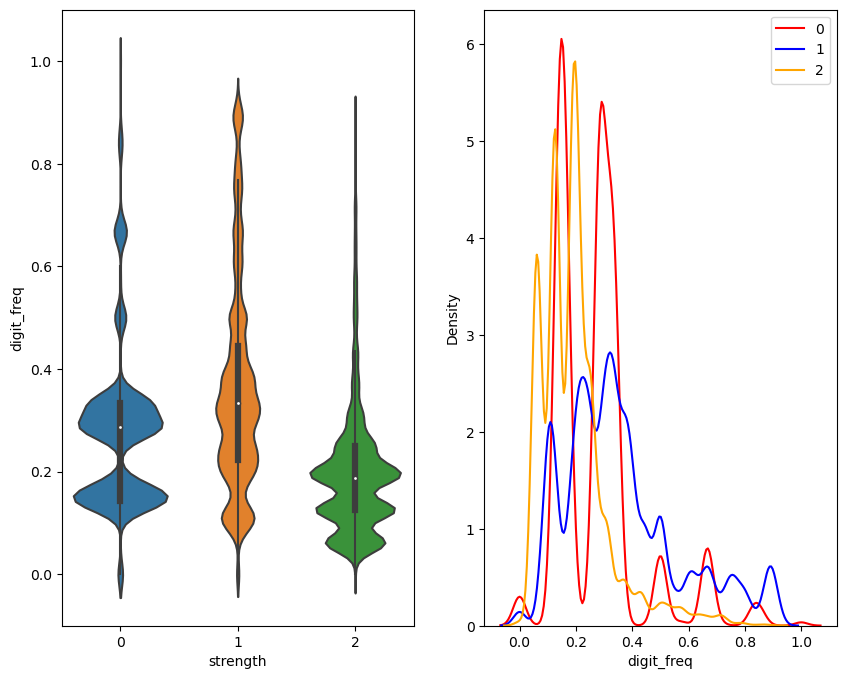

In [251]:
get_dist(data , 'digit_freq')

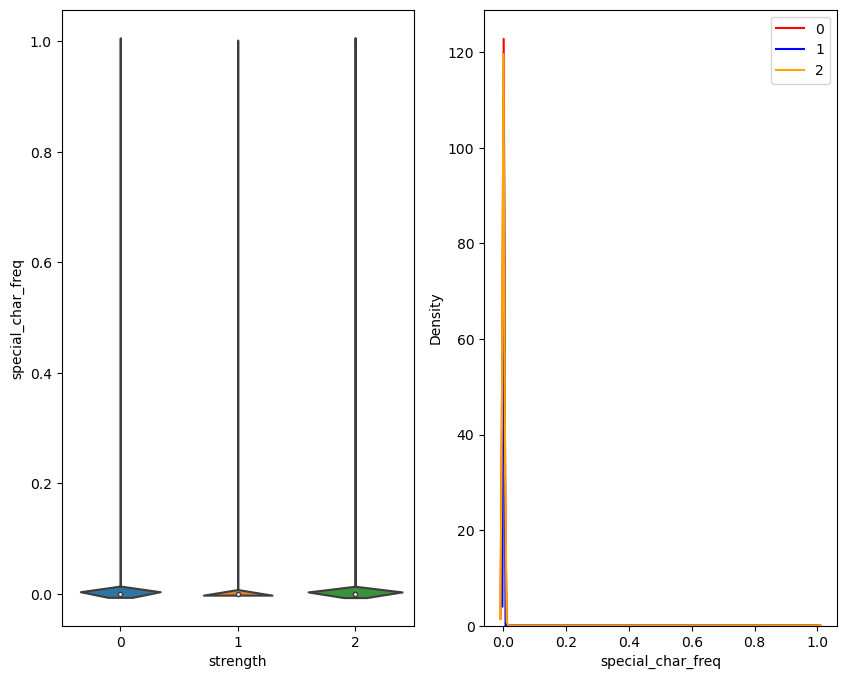

In [252]:
get_dist(data , 'special_char_freq')

Key Insight : It Gives us idea that length & lowercase freq are important features..

## 7.. Applying TF_IDF on data

Applying TF-IDF on data involves computing the TF-IDF scores for the terms in a collection of documents (often represented as a DataFrame or a list of documents), which helps in understanding the importance of each term in each document relative to the entire collection.

TF-IDF stands for Term Frequency-Inverse Document Frequency. It's a statistical measure used in natural language processing and information retrieval to evaluate the importance of a word in a document relative to a collection of documents.

Here's a brief overview of TF-IDF:

1)-- Term Frequency (TF): It measures the frequency of a term (word) in a document. It is calculated as the number of times a                              term appears in a document divided by the total number of terms in the document.

     TF(t,d) = Number of times term t appears in document d / Total number of terms in document d

2)-- Inverse Document Frequency (IDF): It measures the importance of a term in the entire collection of documents. It is                                                calculated as the logarithm of the total number of documents divided by the number of                                           documents containing the term, plus one (to avoid division by zero).


     IDF(t)=log( Total number of document /Number of documents containing term t)+1
            

3)-- TF-IDF:    It combines TF and IDF to assign a weight to each term in a document relative to the entire document collection.                  The TF-IDF score of a term in a document is the product of its TF and IDF scores.

    TF-IDF(t,d)=TF(t,d)×IDF(t)
    
"TF-IDF is calculated for each term in each document, resulting in a matrix where rows represent documents, columns represent              terms, and the values represent TF-IDF scores"    


In [253]:
data.head(4)

,password,strength,lowercase_freq,Uppercase_freq,digit_freq,length,special_char_freq
0,zxe870819,1,0.333,0.0,0.667,9,0
1,xw46454nr23l,1,0.417,0.0,0.583,12,0
2,soporte13,1,0.778,0.0,0.222,9,0
3,accounts6000webhost.com,2,0.783,0.0,0.174,23,0


In [254]:
data

,password,strength,lowercase_freq,Uppercase_freq,digit_freq,length,special_char_freq
0,zxe870819,1,0.333,0.0,0.667,9,0
1,xw46454nr23l,1,0.417,0.0,0.583,12,0
2,soporte13,1,0.778,0.0,0.222,9,0
3,accounts6000webhost.com,2,0.783,0.0,0.174,23,0
4,c443balg,1,0.625,0.0,0.375,8,0
...,...,...,...,...,...,...,...
99995,obejofi215,1,0.700,0.0,0.300,10,0
99996,fmiopvxb64,1,0.800,0.0,0.200,10,0
99997,czvrbun38,1,0.778,0.0,0.222,9,0
99998,mymyxe430,1,0.667,0.0,0.333,9,0


In [257]:
# shuffling randomly for robustness of ML moodel 

dataframe = data.sample(frac=1)

In [258]:
dataframe

,password,strength,lowercase_freq,Uppercase_freq,digit_freq,length,special_char_freq
39739,yoe33ilrfkf8,1,0.750,0.0,0.250,12,0
54442,simples190,1,0.700,0.0,0.300,10,0
83287,31wywym4,1,0.625,0.0,0.375,8,0
5868,serv4318,1,0.500,0.0,0.500,8,0
24555,bl9e2j23,1,0.500,0.0,0.500,8,0
...,...,...,...,...,...,...,...
90869,mara13,0,0.667,0.0,0.333,6,0
28118,kabbe66,0,0.714,0.0,0.286,7,0
70876,qxrvzmh520,1,0.700,0.0,0.300,10,0
75425,knsbchg8,1,0.875,0.0,0.125,8,0


In [259]:
x = list(dataframe["password"])

In [260]:
# import TF-IDF vectorizer to convert text data into numerical data

from sklearn.feature_extraction.text import TfidfVectorizer


As password is a series of chars , we have to calculate TF_IDF values of each char 

Thats why we have to split our password as-->>
 kzde5577-->> ['k', 'z', 'd', 'e', '5', '5', '7', '7']


 then we can compute Tf-Idf value of each character like Tf-IDF value of k , Tf-IDF value of z


In [261]:
vectorizer = TfidfVectorizer(analyzer="char")

In [264]:
S = vectorizer.fit_transform(x)

In [265]:
S.shape


## (100000,1) passwords gets represented using (100000, 99)
## each password gets represented using 99 dimensions ..

(100000, 99)

In [267]:
dataframe["password"].shape

(100000,)

In [268]:
S

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [270]:
### to get entire matrix of TF-IDF for 100000 passwords ..


S.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [271]:
## TF-IDF scores of Ist row

S.toarray()[0] 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.44907267, 0.        ,
       0.        , 0.        , 0.        , 0.25367168, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19548806, 0.6099993 , 0.        , 0.        ,
       0.20257381, 0.        , 0.25840627, 0.24063951, 0.        ,
       0.        , 0.20505187, 0.        , 0.        , 0.22229015,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25786274, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [274]:
dataframe["password"]

39739    yoe33ilrfkf8
54442      simples190
83287        31wywym4
5868         serv4318
24555        bl9e2j23
             ...     
90869          mara13
28118         kabbe66
70876      qxrvzmh520
75425        knsbchg8
35015      komsan1234
Name: password, Length: 100000, dtype: object

In [275]:
len(vectorizer.get_feature_names_out())

99

In [276]:
 # returns feature/char_of_passwords/columns names

vectorizer.get_feature_names_out()

#These are the various chars to which different TF-IDF values are assigned for 100000 passwords ..

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [280]:
T1 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [281]:
T1

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8.. Applying Machine Learning algorithm !

In [283]:
dataframe.columns

Index(['password', 'strength', 'lowercase_freq', 'Uppercase_freq',
       'digit_freq', 'length', 'special_char_freq'],
      dtype='object')

In [284]:
T1["length"] = dataframe['length']
T1["lowercase_freq"]  = dataframe['lowercase_freq']

In [285]:
T1

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [286]:
y = dataframe["strength"]

train -------> TO Learn the Relationship within data 

test  -------> To do Predections, and this testing data is unseen to my model 

In [289]:
from sklearn.model_selection import train_test_split

In [334]:
X_train, X_test, Y_train, Y_test = train_test_split(T1, y, test_size=0.20)

In [335]:
X_train.shape

(80000, 101)

In [336]:
Y_train.shape

(80000,)

In [337]:
from sklearn.linear_model import LogisticRegression

In [338]:
# Here Applying Multinomial Logistic Regression as have 3 catageories in outcomes 

IDP = LogisticRegression(multi_class="multinomial")

In [339]:
IDP.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

In [378]:
#Doing Predection On the X test Data 

Y_pred = IDP.predict(X_train)

In [379]:
Y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [380]:
from collections import Counter

In [381]:
Counter(Y_pred)

Counter({1: 67581, 2: 6934, 0: 5485})

#  9.. Doing prediction on sample data (user-entered input)

As Logistic reg. model'clf' was trained on 101 features [99 from TF-IDF + 2 features from (total_length+lower_case_freq)]hence I am Going to convert any input(password) into (1,101) so that my model will accept this as Input ..

In [344]:
password = '%@123abcd'

In [345]:
sample_array = np.array([password])

In [346]:
sample_matrix = vectorizer.transform(sample_array)

In [347]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [348]:
sample_matrix.toarray().shape

(1, 99)

In [349]:
password

'%@123abcd'

In [350]:
len(password)

9

In [351]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [364]:

len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [365]:
np.append(sample_matrix.toarray(), (9,0.444)).shape

(101,)

In [366]:
np.append(sample_matrix.toarray(), (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [367]:
np.append(sample_matrix.toarray(), (9,0.444)).reshape(1,101).shape

(1, 101)

In [368]:
New_Matrix = np.append(sample_matrix.toarray(), (9,0.444)).reshape(1,101)

In [369]:
IDP.predict(New_Matrix)

array([0], dtype=int64)

In [370]:
# LETS AUTOMATE IT AND/OR  DESIGN THE FUNCTION 

In [371]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = IDP.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"
    

In [372]:
predict()

Enter a password : Saur@4543lucky


'password is strong'

# 10.. Model evaluation :--

CHECKING The Accuracy Using the confusion_matrix, accuracy_score

In [373]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [385]:
print("Shape of Y_test:", Y_test.shape)


Shape of Y_test: (20000,)


In [386]:

print("Shape of Y_pred:", Y_pred.shape)

Shape of Y_pred: (80000,)


In [ ]:
accuracy_score(Y_test, Y_pred)

In [ ]:
confusion_matrix(Y_test, Y_pred)

In [383]:
# Creting Reprot On the Model 

In [ ]:
print(classification_report(Y_test, Y_pred))